Assignment 1 -
Machine Learning 64060 -
Randi Brennan

Modify existing neural network to perform (potentially) better by manipulating hidden layers, units, activation and other concepts discussed in class.

This demonstration follows the neural netowrk IMDB example in the book Deep Learning 
with Python, Author: Francois Chollet.

In [106]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import layers, models, optimizers, losses, metrics

In [3]:
#import IMDB data and set training and test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
#This code can be included to see the data, however to minimize output
#I am not running it in this demonstration
#train_data[0]

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence)for sequence in train_data])

9999

In [7]:
# Define function for creating matrix and setting values to 0 and 1 for processing.
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [8]:
# Use above function to vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# Vectorize labels and set the datatype to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# Configure model and choose layers, units, activation.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Set optimizer and loss function
model.compile(optimizer='rmsprop',
             loss='binary_crossentrophy', 
              metrics=['accuracy'])

In [12]:
# Further configure optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentrophy',
             metrics=['accuracy'])

In [13]:
# Set loss function and metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [14]:
# Split x data into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [15]:
# Split y data into training and validation sets
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
#First evaluation of model performance. This is the text example using 20 Epochs.
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1666 - acc: 0.9397 - val_loss: 0.1497 - val_acc: 0.9483
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1185 - acc: 0.9628 - val_loss: 0.1623 - val_acc: 0.9404
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0946 - acc: 0.9735 - val_loss: 0.1742 - val_acc: 0.9343
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0820 - acc: 0.9754 - val_loss: 0.2018 - val_acc: 0.9234
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0682 - acc: 0.9819 - val_loss: 0.2073 - val_acc: 0.9234
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0522 - acc: 0.9880 - val_loss: 0.2266 - val_acc: 0.9190
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0434 - acc: 0.9900 - val_loss: 0.2528 - val_acc: 0.9159
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0340 - a

[0.8778910040855408, 0.8521199822425842]

In [17]:
# Set variable for keys
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

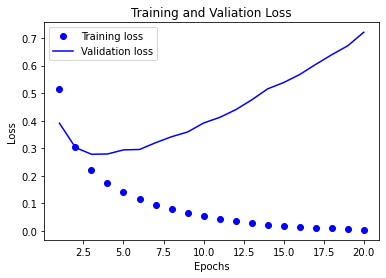

In [18]:
#Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Valiation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

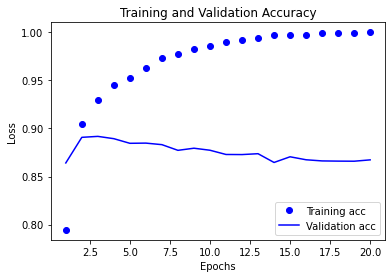

In [91]:
#Plot training and validation accuracy
plt.clf()

plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

This section shows the modifications made to the model to boost performance.
The best result is first, then I am including 5 additional examples of differnet layers,
units, loss functions, activation methods and other tecniques dicussed in class.

In [170]:
# Using 16 units, two layers, dropout and mean absolute error for loss. Activation
# was 'linear' and 'sigmoid'. This model was the most accurate model 
# I was able to build. Loss was fairly low in comparison to other models below.
model = models.Sequential()
model.add(layers.Dense(16, activation = 'linear', input_shape=(10000,)))
model.add(layers.Dropout(0.7, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mae',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, batch_size=450)
results = model.evaluate(x_test, y_test)
results

Epoch 1/7
56/56 [==============================] - 1s 13ms/step - loss: 0.3903 - accuracy: 0.7223
Epoch 2/7
56/56 [==============================] - 0s 8ms/step - loss: 0.2321 - accuracy: 0.8682
Epoch 3/7
56/56 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.8935
Epoch 4/7
56/56 [==============================] - 0s 8ms/step - loss: 0.1435 - accuracy: 0.9073
Epoch 5/7
56/56 [==============================] - 0s 8ms/step - loss: 0.1224 - accuracy: 0.9159
Epoch 6/7
56/56 [==============================] - 0s 8ms/step - loss: 0.1106 - accuracy: 0.9222
Epoch 7/7
782/782 [==============================] - 1s 1ms/step - loss: 0.1245 - accuracy: 0.8905


[0.12445691227912903, 0.8904799818992615]

In [110]:
# This was an experiment adding additional layers, three different activations and using 
# mse for loss. Dropout was also used to help relate the model and help overfitting.
model = models.Sequential()
model.add(layers.Dense(16, activation = 'linear', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dropout(0.7, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'tanh'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=256)
results = model.evaluate(x_test, y_test)
results


Epoch 1/4
98/98 [==============================] - 2s 8ms/step - loss: 0.9149 - accuracy: 0.4997
Epoch 2/4
98/98 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.5191
Epoch 3/4
98/98 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.6366
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.8899


[0.10604095458984375, 0.8898800015449524]

In [116]:
#This model is using multiple dropouts, two differnet activations as well as 
# binary_crossentrophy for loss. 5 Epochs helped with accuracy in this example.
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.7, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
49/49 [==============================] - 2s 19ms/step - loss: 0.6664 - accuracy: 0.5801
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.5261 - accuracy: 0.7666
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.4121 - accuracy: 0.8327
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.3398 - accuracy: 0.8765
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.2961 - accuracy: 0.8830


[0.2960941195487976, 0.8830400109291077]

In [125]:
#Here there are multiple layers, more hidden units, three different activation, 
# a smaller batch size and 5 epochs.
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'tanh'))

model.compile(optimizer='rmsprop',
             loss='mae',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=450)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
56/56 [==============================] - 2s 18ms/step - loss: 0.4174 - accuracy: 0.6380
Epoch 2/5
56/56 [==============================] - 1s 13ms/step - loss: 0.2330 - accuracy: 0.8544
Epoch 3/5
56/56 [==============================] - 1s 13ms/step - loss: 0.1628 - accuracy: 0.9127
Epoch 4/5
56/56 [==============================] - 1s 13ms/step - loss: 0.1205 - accuracy: 0.9326
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.1384 - accuracy: 0.8817


[0.13844771683216095, 0.8817200064659119]

In [140]:
# Experiment using multiple hidden unit values, multiple activations, and multiple layers.
# Using MAE loss function.
model = models.Sequential()
model.add(layers.Dense(64, activation = 'linear', input_shape=(10000,)))
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dropout(0.7, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'tanh'))

model.compile(optimizer='rmsprop',
             loss='mae',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, batch_size=350)
results = model.evaluate(x_test, y_test)
results

Epoch 1/7
72/72 [==============================] - 2s 12ms/step - loss: 0.5983 - accuracy: 0.5116
Epoch 2/7
72/72 [==============================] - 1s 11ms/step - loss: 0.3413 - accuracy: 0.7360
Epoch 3/7
72/72 [==============================] - 1s 11ms/step - loss: 0.2180 - accuracy: 0.8631
Epoch 4/7
72/72 [==============================] - 1s 11ms/step - loss: 0.1334 - accuracy: 0.9114
Epoch 5/7
72/72 [==============================] - 1s 11ms/step - loss: 0.0984 - accuracy: 0.9283
Epoch 6/7
72/72 [==============================] - 1s 11ms/step - loss: 0.0778 - accuracy: 0.9416
Epoch 7/7
782/782 [==============================] - 1s 2ms/step - loss: 0.1277 - accuracy: 0.8814: 0s - loss: 0.1307 


[0.127738818526268, 0.8813999891281128]

In [151]:
# Moved hidden units to 63, activation using linear and relu. Logcosh for loss.
model = models.Sequential()
model.add(layers.Dense(64, activation = 'linear', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Dense(1, activation = 'relu'))

model.compile(optimizer='rmsprop',
             loss='logcosh',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=400)
results = model.evaluate(x_test, y_test)
results

Epoch 1/6
63/63 [==============================] - 2s 15ms/step - loss: 0.1378 - accuracy: 0.6380
Epoch 2/6
63/63 [==============================] - 1s 13ms/step - loss: 0.0602 - accuracy: 0.8423
Epoch 3/6
63/63 [==============================] - 1s 12ms/step - loss: 0.0465 - accuracy: 0.8877
Epoch 4/6
63/63 [==============================] - 1s 12ms/step - loss: 0.0384 - accuracy: 0.9126
Epoch 5/6
63/63 [==============================] - 1s 12ms/step - loss: 0.0347 - accuracy: 0.9225
Epoch 6/6
782/782 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.8777


[0.04620939865708351, 0.8777199983596802]

In [171]:
# Changed the optimizer between ADAGRAD, ADADELTA, SGD and ADAM. Adagrad, adadelta and SGD
# lost almost 45% accuracy
# Attempted with 4 and 5 epochs with these configurations. 
# 5 resulted in a .001 loss in accuracy.

#These are the examples of model manipulation that I am posting for the assignment, 
#however there were many many more iterations. The first example was the most accurate model.
